# Analysis of Yelp Dataset

#### I will analyze Yelp dataset. This dataset is downloaded from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) and uploaded to my S3 bucket.

## Part I: Installation and Initial Setup

In [1]:
%%info

In [2]:
# check currently installed packages
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
11,application_1606143194499_0012,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     0.16.0   
lxml                       4.5.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
setuptools                 28.8.0   
six                        1.13.0   
soupsieve                  1.9.5    
tqdm                       4.48.2   
wheel                      0.29.0   
windmill                   1.6

In [3]:
# install and update necessary dependencies (pandas, matplotlib, searborn, and numpy)
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/46/231de802ade4225b76b96cffe419cf3ce52bbe92e3b092cf12db7d11c207/kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl

  Usi

### Importing Packages

In [4]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Loadning Business Data

In [5]:
business = spark.read.json('s3://sta9760f2020spark-taejun/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
print('Data frame type: ' + str(type(business)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>

### Overview of Data

In [7]:
print(f'Total Columns: {len(business.dtypes)}')
print(f'Total Rows: {business.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393

In [8]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [9]:
print('Columns overview')
pd.DataFrame(business.dtypes, columns = ['Column Name','Data type'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns overview
     Column Name                                          Data type
0        address                                             string
1     attributes  struct<AcceptsInsurance:string,AgesAllowed:str...
2    business_id                                             string
3     categories                                             string
4           city                                             string
5          hours  struct<Friday:string,Monday:string,Saturday:st...
6        is_open                                             bigint
7       latitude                                             double
8      longitude                                             double
9           name                                             string
10   postal_code                                             string
11  review_count                                             bigint
12         stars                                             double
13         state               

In [10]:
#Display the first 5 rows with the following columns: business_id, name, city, state, categories
business.select('business_id','name','city','state','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

## Part II: Analyzing Categories

In [11]:
# The table described from my original yelp dataframe
business.select('business_id','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|f9NumwFMBDn751xgF...|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|Health & Medical,...|
|XNoUzKckATkOD1hP6...|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|Home Services, Pl...|
+--------------------+--------------------+
only showing top 5 rows

In [12]:
# Split categories to each distinct category
from pyspark.sql.functions import explode, split

business_id_categories = business.withColumn("categories", explode(split('categories', ", ")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
# Display the first 5 rows of the association table
business_id_categories.select('business_id', "categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|      categories|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

### Total Unique Categories

In [14]:
unique_categories = business_id_categories.select('business_id', "categories")
unique_categories.select("categories").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

### Top Categories by Business

In [15]:
business_id_categories.groupby("categories").count().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|      Dermatologists|  341|
|      Paddleboarding|   36|
|        Aerial Tours|   28|
|         Hobby Shops|  828|
|          Bubble Tea|  720|
|             Embassy|   13|
|            Handyman|  682|
|             Tanning|  938|
|      Aerial Fitness|   29|
|             Tempura|    1|
|             Falafel|  159|
|       Outlet Stores|  399|
|        Summer Camps|  318|
|     Clothing Rental|   55|
|      Sporting Goods| 2311|
|     Cooking Schools|  118|
|  College Counseling|   15|
|  Lactation Services|   50|
|Ski & Snowboard S...|   50|
|             Museums|  359|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

In [16]:
top_categories = business_id_categories.groupby("categories").count().orderBy('count', ascending=False).limit(20).toPandas()
top_categories = top_categories.set_index('categories','count')
top_categories = top_categories.sort_values(by='count', ascending=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
top_categories.plot.barh(figsize=(15,10), rot=45)
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Top Categories by Business', fontsize=30, fontweight='bold')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Top Categories by Business')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

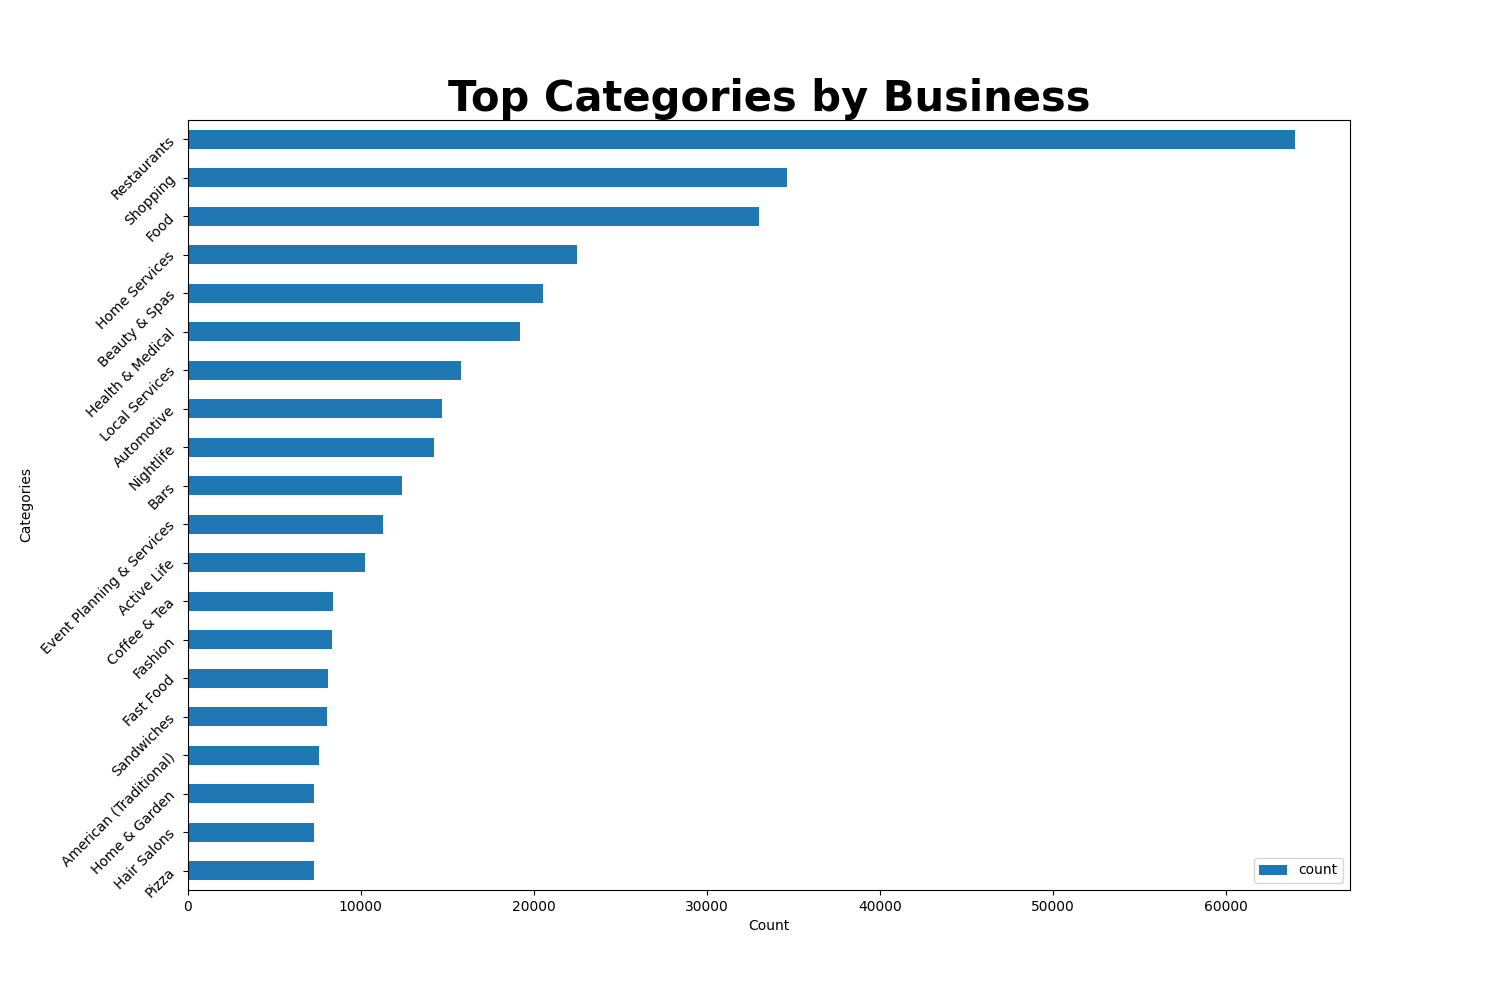

In [18]:
%matplot plt

## Part III: Do Yelp Reviews Skew Negative?

### Loading Review Data

In [19]:
review= spark.read.json('s3://sta9760f2020spark-taejun/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
print('Data frame type: ' + str(type(review)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>

In [21]:
print(f'Total Columns: {len(review.dtypes)}')
print(f'Total Rows: {review.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 9
Total Rows: 8,021,122

In [22]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [23]:
# business and stars data
business_id_stars = review.select('business_id', "stars")
business_id_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

In [24]:
from pyspark.sql.functions import avg
business_id_avg_stars = review.groupby("business_id").avg("stars")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
business_id_avg_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|ipFreSFhjClfNETuM...|               2.6|
|dLDMU8bOLnkDTmPUr...| 4.942857142857143|
|Qm2datcYBPXrPATVG...| 4.352941176470588|
+--------------------+------------------+
only showing top 5 rows

In [26]:
# Join two dataframes by busienss_id
df1 = business_id_avg_stars.select('business_id','avg(stars)')
df2 = business.select('business_id','stars','name','city','state')
joined_df = df1.join(df2, df1.business_id == df2.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
# Display 5 first rows
joined_df = joined_df.select('avg(stars)','stars','name','city','state')
joined_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-----+--------------------+---------+-----+
|      avg(stars)|stars|                name|     city|state|
+----------------+-----+--------------------+---------+-----+
|4.11784140969163|  4.0|Delmonico Steakhouse|Las Vegas|   NV|
|             4.5|  4.5|Mr. Pancho Mexica...|     Mesa|   AZ|
|            3.75|  4.0|Maricopa County D...|  Phoenix|   AZ|
|             4.0|  4.0|Double Play Sport...|Las Vegas|   NV|
|          2.6875|  2.5|  Impressions Dental| Chandler|   AZ|
+----------------+-----+--------------------+---------+-----+
only showing top 5 rows

In [28]:
# Dataframe to Pandas dataframe
skew_df = joined_df.select('avg(stars)','stars').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
skew_df["skew"] = (skew_df['avg(stars)'] - skew_df['stars']) / skew_df['stars']
skew_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        avg(stars)  stars      skew
0         3.411765    3.5 -0.025210
1         3.531646    3.5  0.009042
2         2.600000    2.5  0.040000
3         4.942857    5.0 -0.011429
4         4.352941    4.5 -0.032680
...            ...    ...       ...
209388    4.000000    4.0  0.000000
209389    3.000000    3.0  0.000000
209390    5.000000    5.0  0.000000
209391    1.666667    1.5  0.111111
209392    3.250000    3.0  0.083333

[209393 rows x 3 columns]

### Skewed Distribution of Reviews

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

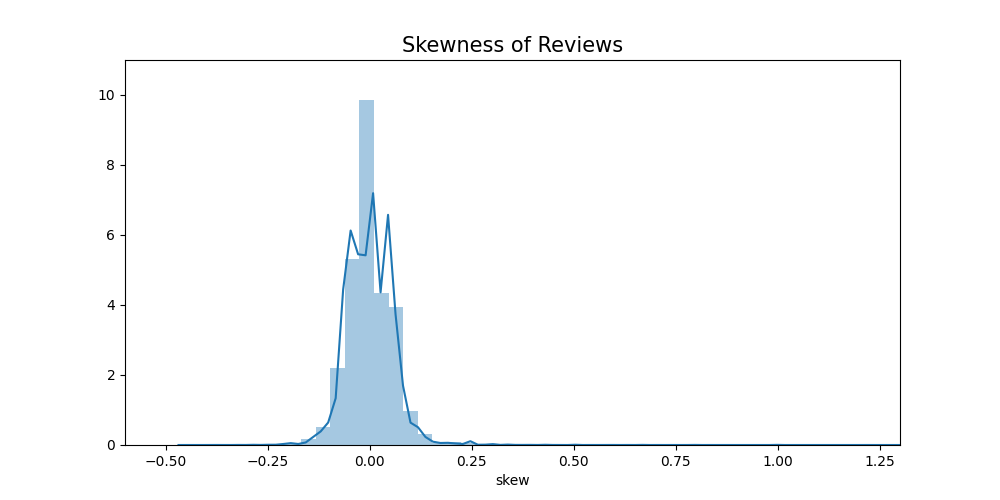

In [30]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.distplot(skew_df["skew"], kde=True)
plt.title('Skewness of Reviews', size = 15)
plt.axis((-0.6, 1.30, 0, 11))

%matplot plt

###  Calculating Skewness 

In [31]:
# Calcuate Pearson's coefficient of skewness with mean, median, and standard deviation
# round up values to calaute values easily

mean = skew_df['skew'].mean().round(5)
median = skew_df['skew'].median().round(5)
std_dev = skew_df['skew'].std().round(5)
skewness = (3 * (mean-median) / std_dev).round(5)

print('Mean: ', mean)
print('Median: ', median)
print('Standard Deviation: ', std_dev)
print('Skewness: ', skewness)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Mean:  0.00124
Median:  0.0
Standard Deviation:  0.05524
Skewness:  0.06734

### IMPLICATIONS
Once I looked at the above graph, I could not decide whether skewness of Yelp reviews is positive or negative. So, I calculated Paerson's coefficient of skewness with mean, median, and standard deviation.

- The formula to calculate skewness is 3 * (Mean - Median) / Standard Deviation
- Mean is 0.00124
- Median is 0.0
- Standard Deviation is 0.05524

By the formula and values, I could get skewness of 0.06734. It is greater than 0 so I can say skewness is positive. It shows that users who wrote reviews were more satisfied than normal. However, it has not a strong positive value and is close to 0, so I would like to say that it is slightly more satisfied than normal.

## Part IV: Should the Elite be Trusted?

### Loading user data

In [32]:
user= spark.read.json('s3://sta9760f2020spark-taejun/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
print('Data frame type: ' + str(type(user)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>

In [34]:
print(f'Total Columns: {len(user.dtypes)}')
print(f'Total Rows: {user.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 22
Total Rows: 1,968,703

In [35]:
user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [36]:
# See necessary columns
user.select('user_id','elite', 'average_stars').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+
|             user_id|               elite|average_stars|
+--------------------+--------------------+-------------+
|ntlvfPzc8eglqvk92...|                    |         3.57|
|FOBRPlBHa3WPHFB5q...|2008,2009,2010,20...|         3.84|
|zZUnPeh2hEp0WydbA...|                2010|         3.44|
|QaELAmRcDc5TfJEyl...|                2009|         3.08|
|xvu8G900tezTzbbfq...|2009,2010,2011,20...|         4.37|
|z5_82komKV3mI4ASG...|                2007|         2.88|
|ttumcu6hWshk_EJVW...|                    |          4.0|
|f4_MRNHvN-yRn7EA8...|2011,2012,2013,20...|         3.63|
|UYACF30806j2mfbB5...|                    |         3.75|
|QG13XBbgHWydzThRB...|           2008,2009|          4.1|
+--------------------+--------------------+-------------+
only showing top 10 rows

In [37]:
# Select only elite users by filter empty value out
elite = user.filter(user['elite'] != '').select('user_id', 'elite', 'average_stars')

# Select columns from Review dataset
review_info = review.select('business_id', 'stars', 'user_id')

# Join two dataframes to get the elite's reviews
elite_review = elite.join(review_info, elite.user_id == review_info.user_id).drop(review['user_id'])
elite_review.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------------+-------------+--------------------+-----+
|             user_id|              elite|average_stars|         business_id|stars|
+--------------------+-------------------+-------------+--------------------+-----+
|1Dul59QEe-Q-7OQHT...|               2017|         3.75|-8F04F54iDT6VgWPC...|  4.0|
|3pMczoCBOSKBcqMhV...|               2017|         4.24|p2OOk46G_AOO0nCWl...|  5.0|
|jO44Apni7iJZVVK4H...|2010,2011,2012,2013|         3.75|jyFoxS8MofdpkAAK6...|  1.0|
|RO78oDy7vbEcOJU8a...|          2017,2018|         3.98|ewty6EB70nwPJsUkA...|  4.0|
|TFxeEvpjMNQ3AWL49...|          2017,2018|         3.89|0M3KCmdY-_xlIu5vE...|  5.0|
+--------------------+-------------------+-------------+--------------------+-----+
only showing top 5 rows

In [38]:
# Get the average starts per each business from Part III
business_id_avg_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|ipFreSFhjClfNETuM...|               2.6|
|dLDMU8bOLnkDTmPUr...| 4.942857142857143|
|Qm2datcYBPXrPATVG...| 4.352941176470588|
+--------------------+------------------+
only showing top 5 rows

In [39]:
# Join Elite review and Business average stars dataframes
elite_review_skew = elite_review.join(business_id_avg_stars, business_id_avg_stars.business_id == elite_review.business_id).drop(elite_review["business_id"])
elite_review_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+-----+--------------------+----------------+
|             user_id|               elite|average_stars|stars|         business_id|      avg(stars)|
+--------------------+--------------------+-------------+-----+--------------------+----------------+
|PMz5Pp3g19MjVmUdT...|           2017,2018|         3.79|  5.0|--9e1ONYQuAa-CB_R...|4.11784140969163|
|y22jM83qCgsNGryv9...|2012,2013,2014,20...|         3.67|  5.0|--9e1ONYQuAa-CB_R...|4.11784140969163|
|jOLdczkaKqfaFb_a_...|           2017,2018|         4.66|  5.0|--9e1ONYQuAa-CB_R...|4.11784140969163|
|le3Xn9Mheb1hNxWur...|2010,2011,2012,20...|         3.86|  5.0|--9e1ONYQuAa-CB_R...|4.11784140969163|
|ERb2hZxyCN9Wz999z...|           2017,2018|         4.24|  4.0|--9e1ONYQuAa-CB_R...|4.11784140969163|
+--------------------+--------------------+-------------+-----+--------------------+----------------+
only showing top 5 rows

In [40]:
# Calcualte skew value 
elite_review_skew = elite_review_skew.toPandas()
elite_review_skew['skew'] = (elite_review_skew['stars'] - elite_review_skew['avg(stars)']) / elite_review_skew['avg(stars)']
elite_review_skew

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                        user_id  ...      skew
0        PMz5Pp3g19MjVmUdT6JTew  ...  0.214228
1        y22jM83qCgsNGryv9328gQ  ...  0.214228
2        jOLdczkaKqfaFb_a_0A6CA  ...  0.214228
3        le3Xn9Mheb1hNxWurF7RSw  ...  0.214228
4        ERb2hZxyCN9Wz999z4a7Cg  ... -0.028617
...                         ...  ...       ...
1756322  EtxsD-Jbyxh7TsaWHtGCew  ...  0.250000
1756323  _BQMCYEIfsn_Ldb4W3TjUg  ... -0.642857
1756324  MMf0LhEk5tGa1LvN7zcDnA  ...  0.071429
1756325  r_B6CZ-gZNKeW1bOzSAXPw  ... -0.785714
1756326  pUjccQauq08ICVR480S-Lg  ... -0.700000

[1756327 rows x 7 columns]

### Skewed Distribution of Elite Reviews

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

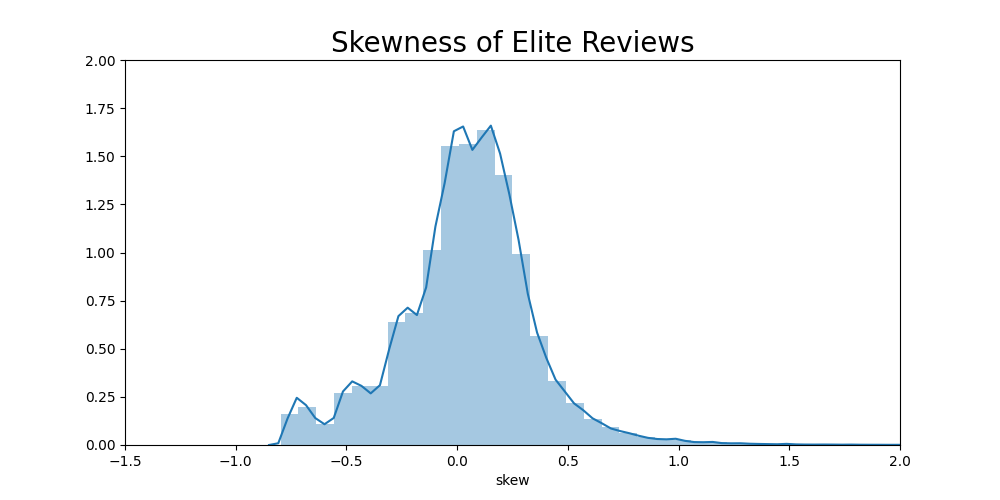

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(elite_review_skew['skew'], kde = True)
plt.title('Skewness of Elite Reviews', size = 20)
plt.axis((-1.5, 2, 0, 2))
%matplot plt

### Calculating Skewness

In [42]:
# Calcuate Pearson's coefficient of skewness with mean, median, and standard deviation
# round up values to calaute values easily

mean = elite_review_skew['skew'].mean().round(5)
median = elite_review_skew['skew'].median().round(5)
std_dev = elite_review_skew['skew'].std().round(5)
skewness = (3 * (mean-median) / std_dev).round(5)

print('Mean: ', mean)
print('Median: ', median)
print('Standard Deviation: ', std_dev)
print('Skewness: ', skewness)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Mean:  0.04378
Median:  0.05655
Standard Deviation:  0.30707
Skewness:  -0.12476

### IMPLICATIONS
A "Skewness of Elite Reviews" graph did not clearly show if skewness is postivie or negative. I calculated Pearson's coefficient of skewness with mean, median, and standard deviation.

- The formula to calculate skewness is 3 * (Mean - Median) / Standard Deviation
- mean is 0.04378
- median is 0.05655
- standard deviation is 0.30707

As a result, I could get skewness of -0.12476. It is less than 0, so I can say skewness is negative. It shows that Elite users were less satisfied than normal business reviews. They might tend to write critic reviews due to the title of the Elite. It would result in leaving more negative reviews than normal business reviews. Skewness is not a strong negative value and is close to 0. It looks like Elite users do not intentionally leave negative reviews.

Elite users would be trusted. However, we don't need to stronlgy trust them or consider only their reviews rather than normal users who left reviews.